In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from env import CarEnv
from stable_baselines3 import PPO

In [2]:
# Initialize an empty DataFrame to store rewards
rewards_df = pd.DataFrame(columns=['episode', 'reward'])

env = CarEnv()
model = PPO.load("models/ppo_2")

num_episodes = 10

# Assume `num_episodes` is the total number of episodes you want to run
for episode in range(num_episodes):
    # Reset the environment and the total reward for this episode
    total_reward = 0
    obs = env.reset()

    action, _states = model.predict(obs, deterministic=False)

    done = False
    while not done:
        # Assume `action` is determined by your policy
        obs, reward, done, info = env.step(action)
        total_reward += reward

        action, _states = model.predict(obs, deterministic=False)

    # At the end of the episode, append the total reward to the DataFrame
    rewards_df = rewards_df.append({'episode': episode, 'reward': total_reward}, ignore_index=True)

# Calculate the average reward per episode
average_reward = rewards_df['reward'].mean()

Environment loading..

Observation space:
Box(-inf, inf, (8,), float16)

Action space:
Discrete(5)

Action space sample:
0


/tmp/ipykernel_21567/3549831783.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rewards_df = rewards_df.append({'episode': episode, 'reward': total_reward}, ignore_index=True)
/tmp/ipykernel_21567/3549831783.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rewards_df = rewards_df.append({'episode': episode, 'reward': total_reward}, ignore_index=True)
/tmp/ipykernel_21567/3549831783.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rewards_df = rewards_df.append({'episode': episode, 'reward': total_reward}, ignore_index=True)
/tmp/ipykernel_21567/3549831783.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rewards_df = rew

In [3]:
print(average_reward)

# ouput the dataframe to a csv file
rewards_df.to_csv('rewards.csv', index=False)

6905.858961591513


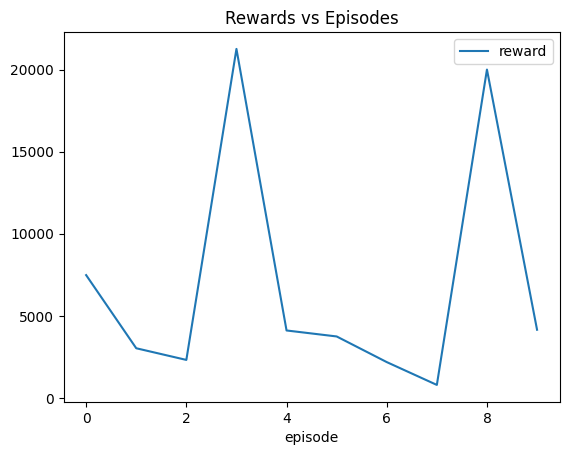

In [6]:
# plot the rewards
rewards_df.plot(x='episode', y='reward', title='Rewards vs Episodes')
plt.show()